In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Reading training and testing files and storing in dataframe training_data and testing_data.

training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')
training_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
training_data.apply(lambda x: sum(x.isnull()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
training_data['Embarked'].mode()
training_data['Embarked'].fillna('S',inplace=True)
training_data['Age'].mean()
training_data['Age'].fillna(29.5,inplace=True)
training_data['Sex'].replace(['male','female'],[1,0],inplace=True)

In [188]:
training_data[['Pclass','Survived']].groupby(by='Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [189]:
training_data[['Sex','Survived']].groupby(by='Sex').mean()

,Survived
Sex,
0,0.742038
1,0.188908


In [190]:
training_data.pivot_table('Survived',['Sex','Pclass'],dropna=True)

Survived
Sex Pclass          
0   1       0.968085
    2       0.921053
    3       0.500000
1   1       0.368852
    2       0.157407
    3       0.135447

In [191]:
training_data.pivot_table('Survived','SibSp')

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


# After this Exploratory data analysis, I have come to a conclusion that Females were more likely to survive than Males, Class 1 passengers had higher probability of surviving the sink and people with siblings >=3 were more likely to sink with the ship

In [261]:
training_data=training_data[['Survived','Sex','Age','Pclass','Fare','Parch','SibSp']]
X=training_data.drop('Survived',axis=1)
y=training_data['Survived']

In [262]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [205]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [206]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [258]:
model.score(X_train,y_train)


0.8346709470304976

In [259]:
model.score(X_test,y_test)

0.8059701492537313

In [198]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,model.predict(X_train))

0.9903691813804173

# Changing Tree depth because our model is overfitting the training data

In [263]:
model = DecisionTreeClassifier(max_depth=3)

In [264]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [265]:
model.score(X_train,y_train)

0.8278443113772455

In [266]:
model.score(X_test,y_test)

0.8251121076233184

In [267]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont




In [268]:
with open("tree1.dot", 'w') as f:
    f = tree.export_graphviz(model,
                                  out_file=f,
                                  impurity = False,
                                  feature_names = X_test.columns.values,
                                  class_names = ['No', 'Yes'],
                                  rounded = True,
                                  filled= True )

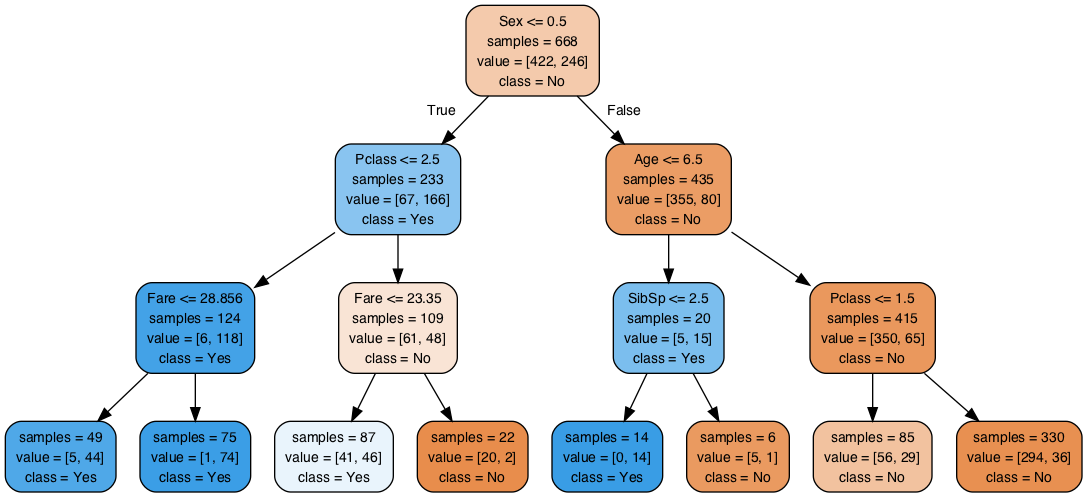

In [269]:

check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

    # Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")